In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Categorical Distributions

## Bar Charts ##

In [2]:
# Highest grossing movies as of 2017
# From http://www.boxofficemojo.com/alltime/adjusted.htm
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
# Convert to millions of dollars for readability
millions = np.round(top_movies.column('Gross (Adjusted)') / 1000000, 3)
top_movies = top_movies.with_column('Millions', millions)
top_movies = top_movies.drop('Gross','Gross (Adjusted)')
top_movies

Title,Studio,Year,Millions
Gone with the Wind,MGM,1939,1796.18
Star Wars,Fox,1977,1583.48
The Sound of Music,Fox,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,1982,1261.09
Titanic,Paramount,1997,1204.37
The Ten Commandments,Paramount,1956,1164.59
Jaws,Universal,1975,1138.62
Doctor Zhivago,MGM,1965,1103.56
The Exorcist,Warner Brothers,1973,983.227
Snow White and the Seven Dwarves,Disney,1937,969.01


In [4]:
#TODO: add a line to only look at top 30
indices = np.arange(30)
top_30 = top_movies.sort('Millions', descending = True).take(indices)
top_30.show()

Title,Studio,Year,Millions
Gone with the Wind,MGM,1939,1796.18
Star Wars,Fox,1977,1583.48
The Sound of Music,Fox,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,1982,1261.09
Titanic,Paramount,1997,1204.37
The Ten Commandments,Paramount,1956,1164.59
Jaws,Universal,1975,1138.62
Doctor Zhivago,MGM,1965,1103.56
The Exorcist,Warner Brothers,1973,983.227
Snow White and the Seven Dwarves,Disney,1937,969.01


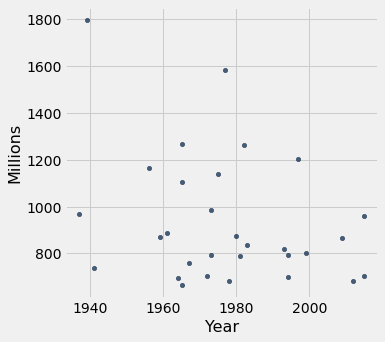

In [5]:
# TODO: Let's try a line plot to plot Year versus Millions. Does this make sense?
top_30.scatter('Year', 'Millions')

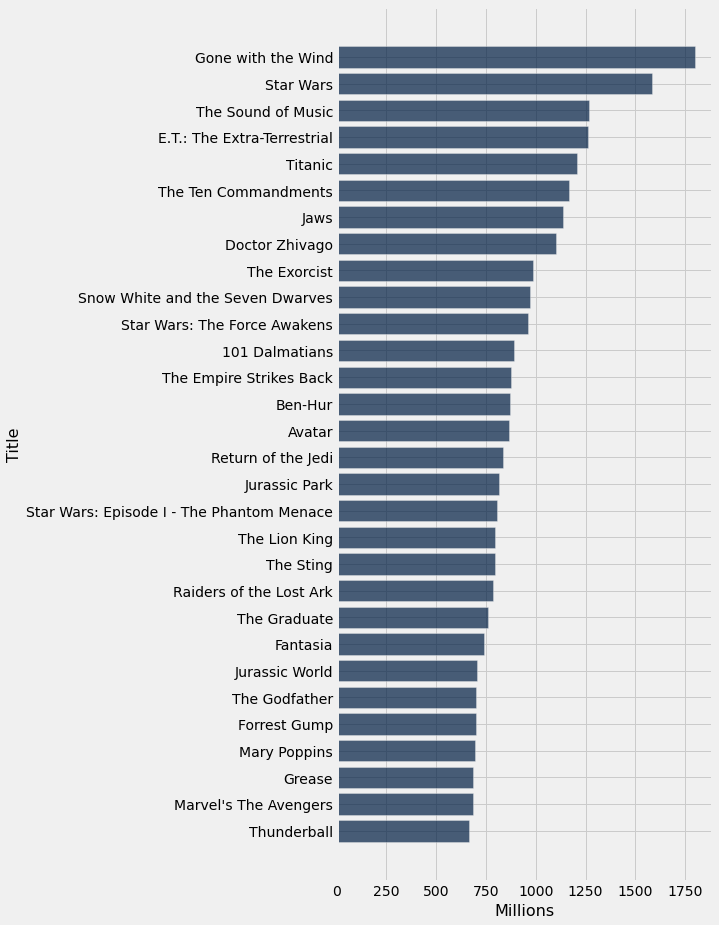

In [6]:
#TODO: Let's try barh instead 
#to look at a categorical variable (Movie) versus a numerical variable (Millions)
top_30.barh('Title', 'Millions')

The visualization above definitely gives us a nice visual about which movie (= categorical variable) made the most millions (numerical variable). But is it a distribution? Does it give as an idea of the proportion of individuals in a specific category? 
Let's look at another column: Studio, how about looking at the number of movies produced by each of the studios

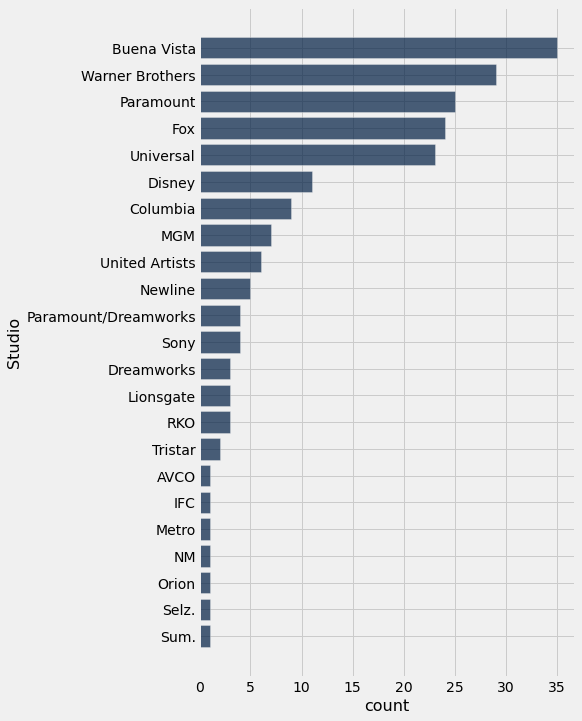

In [29]:
#TODO: use group to look at the studio distribution in the whole data set
studio_distribution = top_movies.group('Studio')
studio_distribution
# let's try barh() again
studio_distribution.sort('count', descending = 'True').barh('Studio')


In [8]:
# How can we verify that this is really a distribution where all of the movies 
#are only represented once? Can we add up all the counts?
np.sum(studio_distribution.column('count'))

200

# Numerical Distributions

In [9]:
#TODO: let's look at how old the movies are, create a new column age
age = 2022 - top_movies.column('Year')
top_movies = top_movies.with_column('age', age)
top_movies


Title,Studio,Year,Millions,age
Gone with the Wind,MGM,1939,1796.18,83
Star Wars,Fox,1977,1583.48,45
The Sound of Music,Fox,1965,1266.07,57
E.T.: The Extra-Terrestrial,Universal,1982,1261.09,40
Titanic,Paramount,1997,1204.37,25
The Ten Commandments,Paramount,1956,1164.59,66
Jaws,Universal,1975,1138.62,47
Doctor Zhivago,MGM,1965,1103.56,57
The Exorcist,Warner Brothers,1973,983.227,49
Snow White and the Seven Dwarves,Disney,1937,969.01,85


In [10]:
#TODO: Can we find the range of different ages in our table?
min(top_movies.column('age')), max(top_movies.column('age'))

(5, 101)

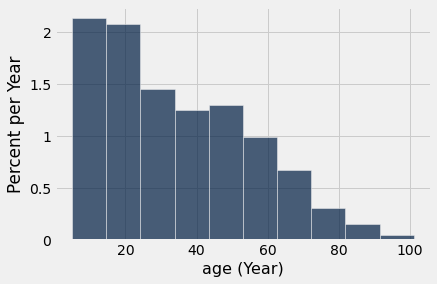

In [11]:
#TODO: let's look at a basic histogram of age, what do you see?
top_movies.hist('age', unit= 'Year')

## Binning

In [12]:
#Use make_array to create my_bins
my_bins = make_array(0,5,10,40,65,102)
my_bins

array([  0,   5,  10,  40,  65, 102], dtype=int64)

In [13]:
# create a table of Age counts using .bin()
binned_movies = top_movies.bin('age', bins = my_bins)
binned_movies

bin,age count
0,0
5,25
10,98
40,56
65,21
102,0


In [14]:
#Let's verify again that all movies are only represented once
sum(binned_movies.column(1))

200

In [15]:
# Try equally spaced bins for Age

In [16]:
#Does the sum of the count add up correctly? Are all movies just represented once?

## Histograms

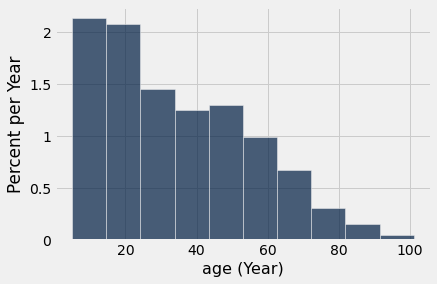

In [17]:
# Let's make our first histogram!
top_movies.hist('age', unit= 'Year')

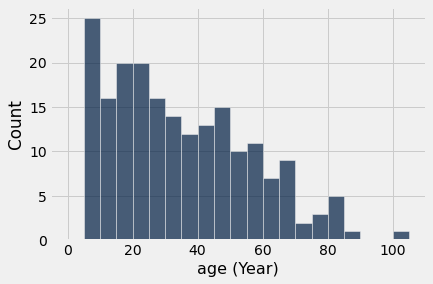

In [18]:
# Let's try equally spaced bins!
top_movies.hist('age', normed = False, bins = np.arange(0,110,5), unit= 'Year')

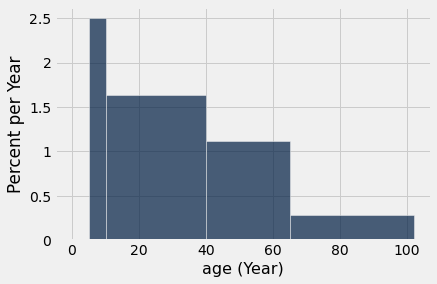

In [19]:
# Let's try not specifying any bins!
top_movies.hist('age', bins = my_bins, unit= 'Year')

In [20]:
#Let's go back to uneven bins

# Add a column containing what percent of movies are in each bin



In [21]:
#Does it add up to 100%?

## Height ##

### Question: What is the height of the [40, 65) bin?

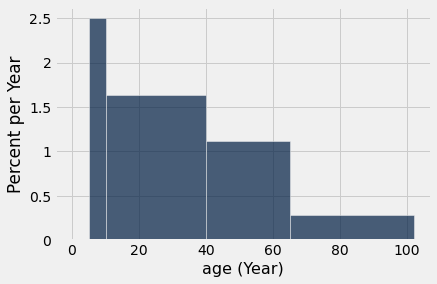

In [22]:
top_movies.hist('age', bins = my_bins, unit = 'Year')

In [23]:
binned_movies

bin,age count
0,0
5,25
10,98
40,56
65,21
102,0


In [24]:
# Step 1: Calculate % of movies in the [40, 65) bin (use the binned_data table)
percent = 100* binned_movies.take(np.arange(binned_movies.num_rows - 1)).column('age count')/200
percent

array([  0. ,  12.5,  49. ,  28. ,  10.5])

In [25]:
# Step 2: Calculate the width of the 40-65 bin
width = np.diff(binned_movies.column('bin'))
width

array([ 5,  5, 30, 25, 37], dtype=int64)

In [26]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent/width
height

array([ 0.        ,  2.5       ,  1.63333333,  1.12      ,  0.28378378])

In [27]:
sum(percent)

100.0